In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time1 = np.array([1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400])
Concentration1 = np.array([0.6122350091, 0.5959560476, 0.5938954744, 0.5500765656,0.6114968206, 0.6070234998, 0.5788902845, 0.610397811,0.6083588308, 0.5728770596, 0.5014242911, 0.5840247494, 0.57757239,0.5915242927, 0.5709132766, 0.5668895169, 0.5516734093, 0.5404909623, 0.5322998247, 0.5335497518, 0.5308234767])

Time2 = [1100,1400,1700,2000,2300,2600,2900,3200,3800,4400,5000,5600,6200,6800,7400,8000,8600,9200,9800,10400,11000]
Concentration2 = [0.4065976517, 0.398277282,0.3890997554,0.4042709267,0.4085997167,0.3893013659,0.3723033081,0.3730377399,0.361164624,0.3552221335,0.354109998,0.3422237102,0.3497295156,0.3346530385,0.3212697806,0.3079156156,0.3056669584,0.3060808548,0.3039224302,0.3023205142,0.3010328339]

Time3 = [900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800]
Concentration3 = [0.234794538,0.2244362203,0.2218997175,0.2135511693,0.2116248215,0.2014145427,0.200706537,0.2054129937,0.1984773812,0.1973842213,0.1966042281,0.1925221024,0.194455232,0.1906051571,0.1891694921,0.1886097215,0.1851571548,0.1858998494,0.1859415305,0.180795238,0.1868895788]

Time4 = [1100,1400,1700,2000,2300,2600,2900,3200,3800,4400,5000,5600,6200,6800,7400,8000,8600,9200,9800,10400,11000]
Concentration4 = [0.8119074939,0.8080550257,0.8056126769,0.8037800776,0.7971050414,0.7952981708,0.7901365596,0.7988397723,0.7892703199,0.7799543858,0.7717273711,0.7678655099,0.7654176994,0.7467064548,0.7093724843,0.6910878323,0.6976557697,0.6933652931,0.6956656918,0.6965078415,0.6884784269]

Time5 = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800])
Concentration5 = np.array([0.578566855,0.571822728,0.534651156,0.538397726,0.52877613,0.527454823,0.524766233,0.506507457,0.496096529,0.483169536,0.474988175,0.474989016,0.466392069,0.459852499,0.4541979,0.455290747,0.456516051,0.458105913,0.458759685,0.456265564,0.455226078])

Time6 = [780,1080,1380,1680,1980,2280,2580,2880,3480,4080,4680,5280,5880,6480,7080,7680,8280,8880,9480,10080,10680]
Concentration6 = [0.4431521957, 0.3734801995,0.3694454804,0.3652467129,0.3545191401,0.3534851964,0.3452264331,0.3420822219,0.3365299156,0.3338307074,0.3269978248,0.3173988634,0.3086842294,0.3029290175,0.2972836748,0.2915360698,0.2890670503,0.2808843891,0.2820585065,0.2832595483,0.280328261]

Time7=[900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800]
Concentration7=[0.9298566259,0.9273753617,0.9249580909,0.9228644065,0.9167521496,0.9141323339,0.9089792409,0.9074454554,0.898869261,0.903062857,0.8949772304,0.8805239819,0.8854835155,0.8683936374,0.8374843377,0.7938727652,0.7975493067,0.808957393,0.8046940862,0.8099867757,0.8083711434]

Time8=[780,1080,1380,1680,1980,2280,2580,2880,3480,4080,4680,5280,5880,6480,7080,7680,8280,8880,9480,10080,10680]
Concentration8=[0.7389686522,0.7266647375,0.7104908473,0.7045533115,0.7020744072,0.6996731009,0.6862451495,0.6945321379,0.6676608997,0.6523242609,0.6521269704,0.6459412781,0.6308360032,0.6284849703,0.6184410652,0.5958937535,0.596790337,0.5844564649,0.5853925637,0.5861264758,0.5860805861]

Time9=[700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3400, 4000, 4600, 5200, 5800, 6400, 7000, 7600, 8200, 8800, 9400, 10000, 10600]
Concentration9=[0.567100911,0.55806661,0.552402276,0.551438362,0.549870445,0.542640664,0.520739187,0.520630394,0.519500363,0.475518394,0.472627019,0.463479808,0.46155871,0.450828366,0.451514849,0.444370262,0.451795351,0.453523969,0.453676045,0.452259622,0.451143698]


def generateODE1(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    f = 1.66 * 10**-7               # m3/sec for the first set of data
    ρc = 1400 * 10**3               # gm/m3
    h = 1 * 10**(-5)                # m
    Vc = h * m11
    ρl = 785 * 10**3                # gm/m3
    V=0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
    
    return [dm00, dm10, dm01, dm11, dc]

def generateODE2(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.4143                     # gm/(100 gm of mixed solvent)
    Ce = 0.1253                     # gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    f = 2.5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    

    return [dm00, dm10, dm01, dm11, dc]
def generateODE3(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.31075                     # gm/(100 gm of mixed solvent)
    Ce = 0.02075                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    f = 4.167 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
def generateODE4(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.8287                     # gm/(100 gm of mixed solvent)
    Ce = 0.5779                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    f = 2.5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]

def generateODE5(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    f = 3.33* 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb *(s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]

def generateODE6(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.4975                     # gm/(100 gm of mixed solvent)
    Ce = 0.19                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    f = 4.167 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]

def generateODE7(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.9346                     # gm/(100 gm of mixed solvent)
    Ce = 0.70325                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]

def generateODE8(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.74875                    # gm/(100 gm of mixed solvent)
    Ce = 0.488                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    f = 4.167 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb *(s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]

def generateODE9(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    f = 5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]


def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed
    
    t_span1 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points1 = 12000
    initialConditions1 = [0, 0, 0, 0, 0.6215]
    sol1 = solve_ivp(
        lambda t, m: generateODE1(t, m, A1, g1, A2, g2, kb, b, V),
        t_span1,
        initialConditions1,
        t_eval=np.linspace(t_span1[0], t_span1[1], num_points1)
    )
    t_span2 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points2 = 12000
    initialConditions2 = [0, 0, 0, 0, 0.4143]
    sol2 = solve_ivp(
        lambda t, m: generateODE2(t, m, A1, g1, A2, g2, kb, b, V),
        t_span2,
        initialConditions2,
        t_eval=np.linspace(t_span2[0], t_span2[1], num_points2)
    )
    t_span3 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points3 = 12000
    initialConditions3 = [0, 0, 0, 0, 0.31075]
    sol3 = solve_ivp(
        lambda t, m: generateODE3(t, m, A1, g1, A2, g2, kb, b, V),
        t_span3,
        initialConditions3,
        t_eval=np.linspace(t_span3[0], t_span3[1], num_points1)
    )
    
    t_span4 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points4 = 12000
    initialConditions4 = [0, 0, 0, 0, 0.8287]
    sol4 = solve_ivp(
        lambda t, m: generateODE4(t, m, A1, g1, A2, g2, kb, b, V),
        t_span4,
        initialConditions4,
        t_eval=np.linspace(t_span4[0], t_span4[1], num_points4)
    )

    t_span5 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points5 = 12000
    initialConditions5 = [0, 0, 0, 0, 0.6215]
    sol5 = solve_ivp(
        lambda t, m: generateODE5(t, m, A1, g1, A2, g2, kb, b, V),
        t_span5,
        initialConditions5,
        t_eval=np.linspace(t_span5[0], t_span5[1], num_points5)
    )

    t_span6 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points6 = 12000
    initialConditions6 = [0, 0, 0, 0, 0.4975]
    sol6 = solve_ivp(
        lambda t, m: generateODE6(t, m, A1, g1, A2, g2, kb, b, V),
        t_span6,
        initialConditions6,
        t_eval=np.linspace(t_span6[0], t_span6[1], num_points6)
    )

    t_span7 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points7 = 12000
    initialConditions7 = [0, 0, 0, 0, 0.9346]
    sol7 = solve_ivp(
        lambda t, m: generateODE7(t, m, A1, g1, A2, g2, kb, b, V),
        t_span7,
        initialConditions7,
        t_eval=np.linspace(t_span7[0], t_span7[1], num_points7)
    )

    t_span8 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points8 = 12000
    initialConditions8 = [0, 0, 0, 0, 0.74879]
    sol8 = solve_ivp(
        lambda t, m: generateODE8(t, m, A1, g1, A2, g2, kb, b, V),
        t_span8,
        initialConditions8,
        t_eval=np.linspace(t_span8[0], t_span8[1], num_points8)
    )

    t_span9 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points9 = 12000
    initialConditions9 = [0, 0, 0, 0, 0.6215]
    sol9 = solve_ivp(
        lambda t, m: generateODE9(t, m, A1, g1, A2, g2, kb, b, V),
        t_span9,
        initialConditions9,
        t_eval=np.linspace(t_span9[0], t_span9[1], num_points9)
    )
    
    # Interpolate the solution at the time points specified in Time
    interp_solution1 = interp1d(sol1.t, sol1.y[4])
    model_predictions1 = interp_solution1(Time1)
    
    interp_solution2 = interp1d(sol2.t, sol2.y[4])
    model_predictions2 = interp_solution2(Time2)
    
    interp_solution3 = interp1d(sol3.t, sol3.y[4])
    model_predictions3 = interp_solution3(Time3)
    
    interp_solution4 = interp1d(sol4.t, sol4.y[4])
    model_predictions4 = interp_solution4(Time4)

    interp_solution5 = interp1d(sol5.t, sol5.y[4])
    model_predictions5 = interp_solution5(Time5)
    
    interp_solution6 = interp1d(sol6.t, sol6.y[4])
    model_predictions6 = interp_solution6(Time6)
    
    interp_solution7 = interp1d(sol7.t, sol7.y[4])
    model_predictions7 = interp_solution7(Time7)
    
    interp_solution8 = interp1d(sol8.t, sol8.y[4])
    model_predictions8 = interp_solution4(Time8)

    interp_solution9 = interp1d(sol9.t, sol9.y[4])
    model_predictions9 = interp_solution4(Time9)
    
    error1 = model_predictions1 - Concentration1
    error2 = model_predictions2 - Concentration2
    error3 = model_predictions3 - Concentration3
    error4 = model_predictions4 - Concentration4
    error5 = model_predictions5 - Concentration5
    error6 = model_predictions6 - Concentration6
    error7 = model_predictions7 - Concentration7
    error8 = model_predictions8 - Concentration8
    error9 = model_predictions9 - Concentration9

    total_error = np.concatenate((error1**2, error2**2,error3**2, error4**2,error5**2, error6**2,error7**2, error8**2, error9**2))

    
    # Return the sum of squared errors
    return np.sum(total_error)

# Initial guess for parameters
initial_guess = [0.001,1.3674,0.001,0.8806,1.9159,0.1172]
# Bounds for the parameters
bounds = [(0.001, 3),   # A1
          (0.001, 3),      # g1
          (0.001, 3),     # A2
          (0.001, 3),        # g2
          (0.001, 3),        # kb
          (0.001, 3)]        # b

# Minimize the objective function with bounds
result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=bounds)

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

Optimized Parameters:
A1: 0.001
g1: 1.0639959475584404
A2: 0.001
g2: 1.2270051025862994
kb: 1.6754359784651756
b: 0.0886784653457505


In [ ]:
1.1258675408908783e-05,2.9999999805182034,1.136107668459068e-05,2.9999999821567687,0.0010000168422358022,0.001

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time1 = np.array([1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400])
Concentration1 = np.array([0.6122350091, 0.5959560476, 0.5938954744, 0.5500765656,0.6114968206, 0.6070234998, 0.5788902845, 0.610397811,0.6083588308, 0.5728770596, 0.5014242911, 0.5840247494, 0.57757239,0.5915242927, 0.5709132766, 0.5668895169, 0.5516734093, 0.5404909623, 0.5322998247, 0.5335497518, 0.5308234767])

Time2 = [1100,1400,1700,2000,2300,2600,2900,3200,3800,4400,5000,5600,6200,6800,7400,8000,8600,9200,9800,10400,11000]
Concentration2 = [0.4065976517, 0.398277282,0.3890997554,0.4042709267,0.4085997167,0.3893013659,0.3723033081,0.3730377399,0.361164624,0.3552221335,0.354109998,0.3422237102,0.3497295156,0.3346530385,0.3212697806,0.3079156156,0.3056669584,0.3060808548,0.3039224302,0.3023205142,0.3010328339]

Time3 = [900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800]
Concentration3 = [0.234794538,0.2244362203,0.2218997175,0.2135511693,0.2116248215,0.2014145427,0.200706537,0.2054129937,0.1984773812,0.1973842213,0.1966042281,0.1925221024,0.194455232,0.1906051571,0.1891694921,0.1886097215,0.1851571548,0.1858998494,0.1859415305,0.180795238,0.1868895788]

Time4 = [1100,1400,1700,2000,2300,2600,2900,3200,3800,4400,5000,5600,6200,6800,7400,8000,8600,9200,9800,10400,11000]
Concentration4 = [0.8119074939,0.8080550257,0.8056126769,0.8037800776,0.7971050414,0.7952981708,0.7901365596,0.7988397723,0.7892703199,0.7799543858,0.7717273711,0.7678655099,0.7654176994,0.7467064548,0.7093724843,0.6910878323,0.6976557697,0.6933652931,0.6956656918,0.6965078415,0.6884784269]

Time5 = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800])
Concentration5 = np.array([0.578566855,0.571822728,0.534651156,0.538397726,0.52877613,0.527454823,0.524766233,0.506507457,0.496096529,0.483169536,0.474988175,0.474989016,0.466392069,0.459852499,0.4541979,0.455290747,0.456516051,0.458105913,0.458759685,0.456265564,0.455226078])

Time6 = [780,1080,1380,1680,1980,2280,2580,2880,3480,4080,4680,5280,5880,6480,7080,7680,8280,8880,9480,10080,10680]
Concentration6 = [0.4431521957, 0.3734801995,0.3694454804,0.3652467129,0.3545191401,0.3534851964,0.3452264331,0.3420822219,0.3365299156,0.3338307074,0.3269978248,0.3173988634,0.3086842294,0.3029290175,0.2972836748,0.2915360698,0.2890670503,0.2808843891,0.2820585065,0.2832595483,0.280328261]

Time7=[900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800]
Concentration7=[0.9298566259,0.9273753617,0.9249580909,0.9228644065,0.9167521496,0.9141323339,0.9089792409,0.9074454554,0.898869261,0.903062857,0.8949772304,0.8805239819,0.8854835155,0.8683936374,0.8374843377,0.7938727652,0.7975493067,0.808957393,0.8046940862,0.8099867757,0.8083711434]

Time8=[780,1080,1380,1680,1980,2280,2580,2880,3480,4080,4680,5280,5880,6480,7080,7680,8280,8880,9480,10080,10680]
Concentration8=[0.7389686522,0.7266647375,0.7104908473,0.7045533115,0.7020744072,0.6996731009,0.6862451495,0.6945321379,0.6676608997,0.6523242609,0.6521269704,0.6459412781,0.6308360032,0.6284849703,0.6184410652,0.5958937535,0.596790337,0.5844564649,0.5853925637,0.5861264758,0.5860805861]

Time9=[700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3400, 4000, 4600, 5200, 5800, 6400, 7000, 7600, 8200, 8800, 9400, 10000, 10600]
Concentration9=[0.567100911,0.55806661,0.552402276,0.551438362,0.549870445,0.542640664,0.520739187,0.520630394,0.519500363,0.475518394,0.472627019,0.463479808,0.46155871,0.450828366,0.451514849,0.444370262,0.451795351,0.453523969,0.453676045,0.452259622,0.451143698]


def generateODE1(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)

    # Calculate necessary quantities
    f = 1.66 * 10**-7               # m3/sec for the first set of data
    ρc = 1400 * 10**3               # gm/m3
    h = 1 * 10**(-5)                # m
    Vc = h * m11
    ρl = 785 * 10**3                # gm/m3
    V=0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb *(s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]

def generateODE2(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.4143                     # gm/(100 gm of mixed solvent)
    Ce = 0.1253                     # gm/(100 gm of mixed solvent)

    #calulate neccessary quantity

    f = 2.5 * 10**-7                     # m3/sec
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]
def generateODE3(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.31075                     # gm/(100 gm of mixed solvent)
    Ce = 0.02075                      # gm/(100 gm of mixed solvent)

    # Calculate necessary quantities
    f = 4.167 * 10**-7                     # m3/sec
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb *(s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]
def generateODE4(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.8287                     # gm/(100 gm of mixed solvent)
    Ce = 0.5779                      # gm/(100 gm of mixed solvent)

    # Calculate necessary quantities

    f = 2.5 * 10**-7                     # m3/sec
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]

def generateODE5(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)

    # Calculate necessary quantities

    f = 3.33* 10**-7                     # m3/sec
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]

def generateODE6(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.4975                     # gm/(100 gm of mixed solvent)
    Ce = 0.19                      # gm/(100 gm of mixed solvent)

    # Calculate necessary quantities

    f = 4.167 * 10**-7                     # m3/sec
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb *(s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]

def generateODE7(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.9346                     # gm/(100 gm of mixed solvent)
    Ce = 0.70325                      # gm/(100 gm of mixed solvent)

    # Calculate necessary quantities

    f = 3.33 * 10**-7                     # m3/sec
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]

def generateODE8(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.74875                    # gm/(100 gm of mixed solvent)
    Ce = 0.488                      # gm/(100 gm of mixed solvent)

    # Calculate necessary quantities

    f = 4.167 * 10**-7                     # m3/sec
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]

def generateODE9(t, m, A1, g1, A2, g2, kb, b, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)

    # Calculate necessary quantities

    f = 5 * 10**-7                     # m3/sec
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f

    delta_c = max(c - Ce, 0)
    s = delta_c / Ce

    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb *(s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc


    return [dm00, dm10, dm01, dm11, dc]


def objective(params):
    A1, g1, A2, g2, kb, b = params
    V = 0.0002  # Volume, adjust as needed

    t_span1 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points1 = 12000
    initialConditions1 = [0, 0, 0, 0, 0.6215]
    sol1 = solve_ivp(
        lambda t, m: generateODE1(t, m, A1, g1, A2, g2, kb, b, V),
        t_span1,
        initialConditions1,
        t_eval=np.linspace(t_span1[0], t_span1[1], num_points1)
    )
    t_span2 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points2 = 12000
    initialConditions2 = [0, 0, 0, 0, 0.4143]
    sol2 = solve_ivp(
        lambda t, m: generateODE2(t, m, A1, g1, A2, g2, kb, b, V),
        t_span2,
        initialConditions2,
        t_eval=np.linspace(t_span2[0], t_span2[1], num_points2)
    )
    t_span3 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points3 = 12000
    initialConditions3 = [0, 0, 0, 0, 0.31075]
    sol3 = solve_ivp(
        lambda t, m: generateODE3(t, m, A1, g1, A2, g2, kb, b, V),
        t_span3,
        initialConditions3,
        t_eval=np.linspace(t_span3[0], t_span3[1], num_points1)
    )

    t_span4 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points4 = 12000
    initialConditions4 = [0, 0, 0, 0, 0.8287]
    sol4 = solve_ivp(
        lambda t, m: generateODE4(t, m, A1, g1, A2, g2, kb, b, V),
        t_span4,
        initialConditions4,
        t_eval=np.linspace(t_span4[0], t_span4[1], num_points4)
    )

    t_span5 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points5 = 12000
    initialConditions5 = [0, 0, 0, 0, 0.6215]
    sol5 = solve_ivp(
        lambda t, m: generateODE5(t, m, A1, g1, A2, g2, kb, b, V),
        t_span5,
        initialConditions5,
        t_eval=np.linspace(t_span5[0], t_span5[1], num_points5)
    )

    t_span6 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points6 = 12000
    initialConditions6 = [0, 0, 0, 0, 0.4975]
    sol6 = solve_ivp(
        lambda t, m: generateODE6(t, m, A1, g1, A2, g2, kb, b, V),
        t_span6,
        initialConditions6,
        t_eval=np.linspace(t_span6[0], t_span6[1], num_points6)
    )

    t_span7 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points7 = 12000
    initialConditions7 = [0, 0, 0, 0, 0.9346]
    sol7 = solve_ivp(
        lambda t, m: generateODE7(t, m, A1, g1, A2, g2, kb, b, V),
        t_span7,
        initialConditions7,
        t_eval=np.linspace(t_span7[0], t_span7[1], num_points7)
    )

    t_span8 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points8 = 12000
    initialConditions8 = [0, 0, 0, 0, 0.74879]
    sol8 = solve_ivp(
        lambda t, m: generateODE8(t, m, A1, g1, A2, g2, kb, b, V),
        t_span8,
        initialConditions8,
        t_eval=np.linspace(t_span8[0], t_span8[1], num_points8)
    )

    t_span9 = (0, 12000)  # Adjust this to match the maximum time in your data
    num_points9 = 12000
    initialConditions9 = [0, 0, 0, 0, 0.6215]
    sol9 = solve_ivp(
        lambda t, m: generateODE9(t, m, A1, g1, A2, g2, kb, b, V),
        t_span9,
        initialConditions9,
        t_eval=np.linspace(t_span9[0], t_span9[1], num_points9)
    )

    # Interpolate the solution at the time points specified in Time
    interp_solution1 = interp1d(sol1.t, sol1.y[4])
    model_predictions1 = interp_solution1(Time1)

    interp_solution2 = interp1d(sol2.t, sol2.y[4])
    model_predictions2 = interp_solution2(Time2)

    interp_solution3 = interp1d(sol3.t, sol3.y[4])
    model_predictions3 = interp_solution3(Time3)

    interp_solution4 = interp1d(sol4.t, sol4.y[4])
    model_predictions4 = interp_solution4(Time4)

    interp_solution5 = interp1d(sol5.t, sol5.y[4])
    model_predictions5 = interp_solution5(Time5)

    interp_solution6 = interp1d(sol6.t, sol6.y[4])
    model_predictions6 = interp_solution6(Time6)

    interp_solution7 = interp1d(sol7.t, sol7.y[4])
    model_predictions7 = interp_solution7(Time7)

    interp_solution8 = interp1d(sol8.t, sol8.y[4])
    model_predictions8 = interp_solution4(Time8)

    interp_solution9 = interp1d(sol9.t, sol9.y[4])
    model_predictions9 = interp_solution4(Time9)

    error1 = model_predictions1 - Concentration1
    error2 = model_predictions2 - Concentration2
    error3 = model_predictions3 - Concentration3
    error4 = model_predictions4 - Concentration4
    error5 = model_predictions5 - Concentration5
    error6 = model_predictions6 - Concentration6
    error7 = model_predictions7 - Concentration7
    error8 = model_predictions8 - Concentration8
    error9 = model_predictions9 - Concentration9

    total_error = np.concatenate((error1**2, error2**2,error3**2, error4**2,error5**2, error6**2,error7**2, error8**2, error9**2))


    # Return the sum of squared errors
    return np.sum(total_error)

# Initial guess for parameters
initial_guess =  [0.001,1.3674422124010206,0.001,0.8806401378356327,1.9159735378591962,0.11727791169769848]
# Bounds for the parameters
bounds = [(0.001, 300),   # A1
          (0.001, 300),      # g1
          (0.001, 300),     # A2
          (0.001, 300),        # g2
          (0.001, 300),        # kb
          (0.001, 300)]        # b

# Minimize the objective function with bounds
result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=bounds)

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb_opt, b_opt = result.x

print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb:", kb_opt)
print("b:", b_opt)

C:\Users\heman\AppData\Local\Temp\ipykernel_932\3719696815.py:88: RuntimeWarning: overflow encountered in scalar power
  Gl = A1 * (s)**g1
C:\Users\heman\AppData\Local\Temp\ipykernel_932\3719696815.py:89: RuntimeWarning: overflow encountered in scalar power
  Gw = A2 * (s)**g2
C:\Users\heman\AppData\Local\Temp\ipykernel_932\3719696815.py:90: RuntimeWarning: overflow encountered in scalar power
  B = kb * (s)**b
C:\Users\heman\AppData\Local\Temp\ipykernel_932\3719696815.py:93: RuntimeWarning: invalid value encountered in scalar subtract
  dm10 = (Gl * m00) - (m10 / tau)
C:\Users\heman\AppData\Local\Temp\ipykernel_932\3719696815.py:94: RuntimeWarning: invalid value encountered in scalar subtract
  dm01 = (Gw * m00) - (m01 / tau)
C:\Users\heman\AppData\Local\Temp\ipykernel_932\3719696815.py:95: RuntimeWarning: invalid value encountered in scalar subtract
  dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
C:\Users\heman\AppData\Local\Temp\ipykernel_932\3719696815.py:95: RuntimeWarning: overflo

Optimized Parameters:
A1: 0.001
g1: 1.3674422335246772
A2: 0.001
g2: 0.8806401407716695
kb: 1.9159735437909502
b: 0.11727791909470649


In [ ]:
0.001,2.46744,0.001,1.98064,0.3159,0.1172
0.001,1.0639959475584404,0.001,1.2270051025862994,1.6754359784651756,0.0886784653457505

Text(0, 0.5, 'Concentration')

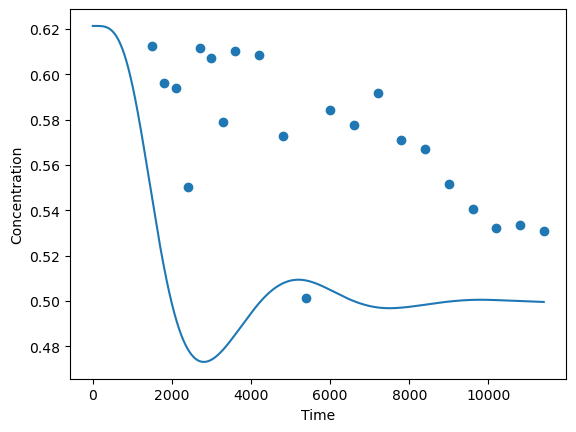

In [11]:
def generateODE1(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1= 0.001
    g1= 2.46744
    A2= 0.001
    g2= 1.98064
    kb= 0.3159
    b= 0.1172
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B - (m00/tau)
    dm10=(Gl*m00)-(m10/tau)
    dm01=(Gw*m00)-(m01/tau)
    dm11=(Gl*m10)+(Gw*m01)-(m11/tau)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(c/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,11400)
num_points=11400
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE1(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
Time1 = np.array([1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400])
Concentration1 = np.array([0.6122350091, 0.5959560476, 0.5938954744, 0.5500765656,0.6114968206, 0.6070234998, 0.5788902845, 0.610397811,0.6083588308, 0.5728770596, 0.5014242911, 0.5840247494, 0.57757239,0.5915242927, 0.5709132766, 0.5668895169, 0.5516734093, 0.5404909623, 0.5322998247, 0.5335497518, 0.5308234767])
plt.scatter(Time1, Concentration1)
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")

Text(0, 0.5, 'Concentration (gm / 100gm of mixed solvent)')

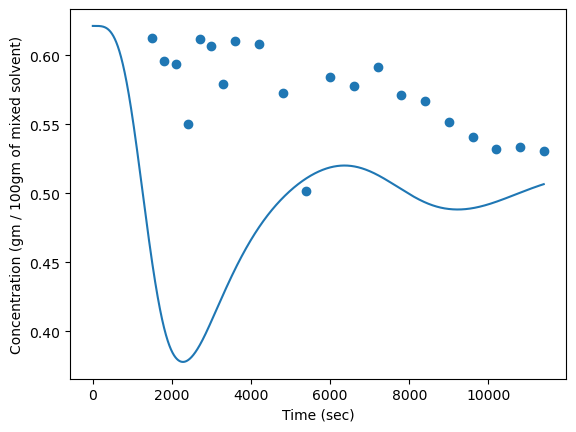

In [40]:
def generateODE1(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    
    A1= 0.0007236835592532926
    g1= 1
    A2=0.0007215339371917877
    g2= 1
    kb= 3.215015045461699
    b= 3.99
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    
    f=1.66*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B - (m00/tau)
    dm10=(Gl*m00)-(m10/tau)
    dm01=(Gw*m00)-(m01/tau)
    dm11=(Gl*m10)+(Gw*m01)-(m11/tau)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(c/tau)-(ρc/ρl)*Vc
    if c + dc < 0:
        dc = -c
        
    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,11400)
num_points=11400
initialConditions = [0, 0, 0, 0,0.6213]
sol1 = solve_ivp(
    lambda t,m: generateODE1(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
Time1 = np.array([1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800, 11400])
Concentration1 = np.array([0.6122350091, 0.5959560476, 0.5938954744, 0.5500765656,0.6114968206, 0.6070234998, 0.5788902845, 0.610397811,0.6083588308, 0.5728770596, 0.5014242911, 0.5840247494, 0.57757239,0.5915242927, 0.5709132766, 0.5668895169, 0.5516734093, 0.5404909623, 0.5322998247, 0.5335497518, 0.5308234767])
plt.scatter(Time1, Concentration1)
plt.plot(sol1.t,sol1.y[4])
plt.xlabel("Time (sec)")
plt.ylabel("Concentration (gm / 100gm of mixed solvent)")

C:\Users\heman\AppData\Local\Temp\ipykernel_932\1503609305.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(sol1.t, sol1.y[1]/sol1.y[0])


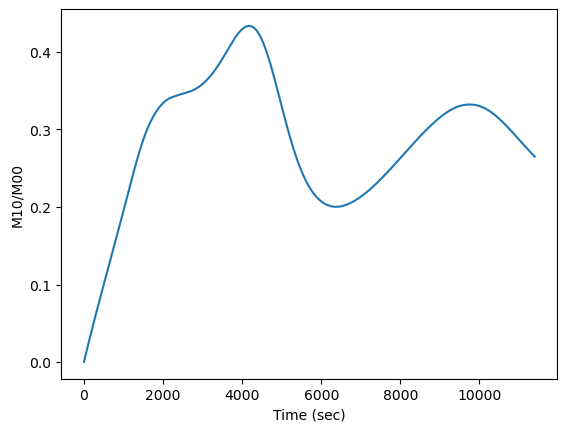

In [21]:
plt.plot(sol1.t, sol1.y[1]/sol1.y[0])
plt.xlabel("Time (sec)")
plt.ylabel("M10/M00")
plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_932\817433761.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(sol1.t, sol1.y[2]/sol1.y[0])


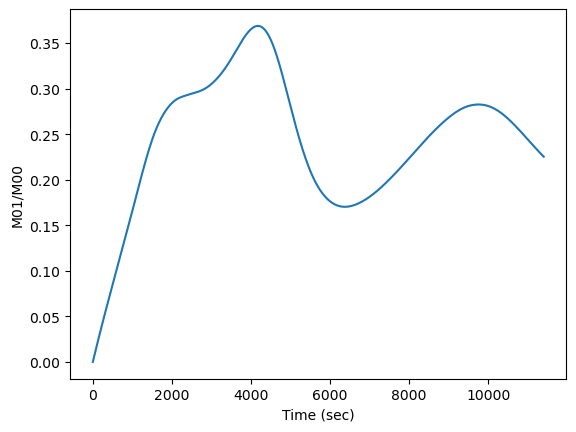

In [22]:
plt.plot(sol1.t, sol1.y[2]/sol1.y[0])
plt.xlabel("Time (sec)")
plt.ylabel("M01/M00")
plt.show()

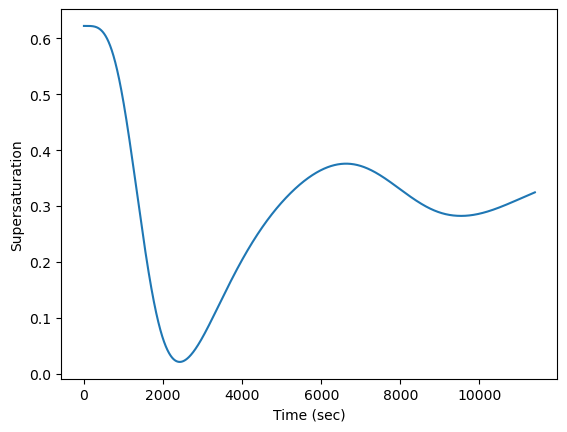

In [23]:
plt.plot(sol1.t, ((sol1.y[4] - 0.383) / 0.383))
plt.xlabel("Time (sec)")
plt.ylabel("Supersaturation")
plt.show()

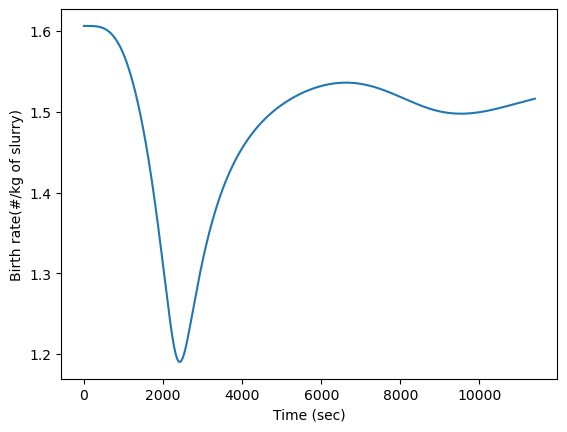

In [24]:
plt.plot(sol1.t, kb_opt * ((sol1.y[4] - 0.383) / 0.383)**b_opt)
plt.xlabel("Time (sec)")
plt.ylabel("Birth rate(#/kg of slurry)")
plt.show()

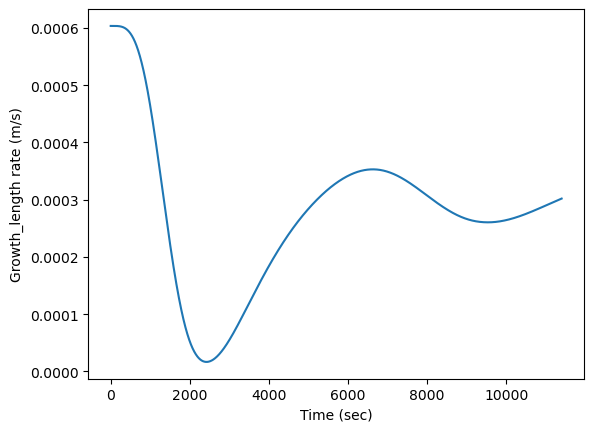

In [25]:
plt.plot(sol1.t, A1_opt * ((sol1.y[4] - 0.383) / 0.383)**g1_opt)
plt.xlabel("Time (sec)")
plt.ylabel("Growth_length rate (m/s)")
plt.show()

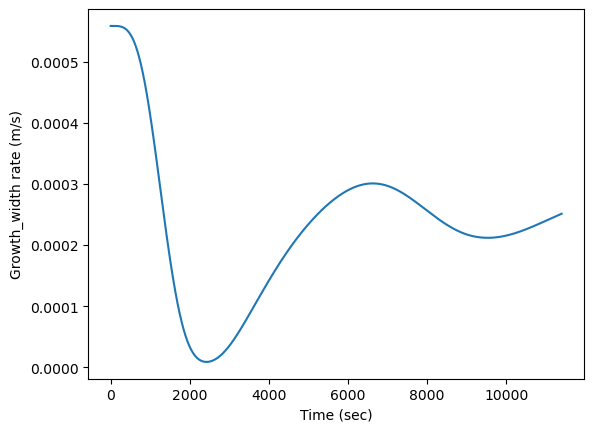

In [26]:
plt.plot(sol1.t, A2_opt * ((sol1.y[4] - 0.383) / 0.383)**g2_opt)
plt.xlabel("Time (sec)")
plt.ylabel("Growth_width rate (m/s)")
plt.show()

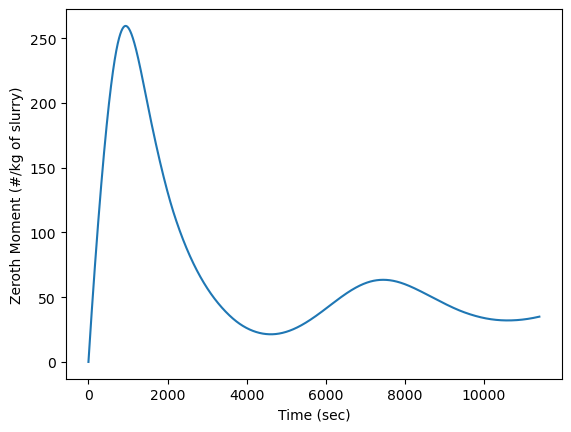

In [27]:
plt.plot(sol1.t, sol1.y[0], label='Model')
plt.xlabel("Time (sec)")
plt.ylabel("Zeroth Moment (#/kg of slurry)")
plt.show()

Text(0, 0.5, 'Concentration (gm/100gm of mixed solvent)')

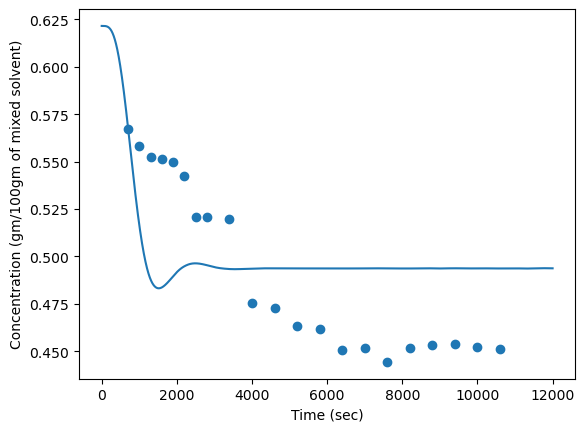

In [57]:
def generateODE9(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    A1= 0.0007236835592532926
    g1= 1
    A2=0.0007215339371917877
    g2= 1
    kb= 3.215015045461699
    b= 0.00111
    
    f = 5 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
t_span9 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points9 = 12000
initialConditions9 = [0, 0, 0, 0, 0.6215]
sol9 = solve_ivp(
    lambda t, m: generateODE9(t, m),
    t_span9,
    initialConditions9,
    t_eval=np.linspace(t_span9[0], t_span9[1], num_points9)
)
Time9=[700, 1000, 1300, 1600, 1900, 2200, 2500, 2800, 3400, 4000, 4600, 5200, 5800, 6400, 7000, 7600, 8200, 8800, 9400, 10000, 10600]
Concentration9=[0.567100911,0.55806661,0.552402276,0.551438362,0.549870445,0.542640664,0.520739187,0.520630394,0.519500363,0.475518394,0.472627019,0.463479808,0.46155871,0.450828366,0.451514849,0.444370262,0.451795351,0.453523969,0.453676045,0.452259622,0.451143698]
plt.scatter(Time9, Concentration9)
plt.plot(sol9.t,sol9.y[4])
plt.xlabel("Time (sec)")
plt.ylabel("Concentration (gm/100gm of mixed solvent)")